In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!git clone https://github.com/ucfilho/ANN
%cd ANN
DAT = pd.read_csv('Hydrofoil_ago_29_2018.csv')

Cloning into 'ANN'...
remote: Counting objects: 51, done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 51 (delta 14), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (51/51), done.
/content/ANN


In [0]:
DAT01=pd.read_csv("Hydrofoil_ago_29_2018.csv")

In [4]:
Index=[2,3,4,5,6,7]
DAT02=[]
DAT02=DAT01.iloc[:,Index].copy()
print(DAT02.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0          1  0.000000    0.000000  0.000000  0.000000  0.000000
1          1  0.103733    2.549729 -0.689028  1.353022  0.950991
2          1  0.124480    3.628461 -0.835413  1.346323  1.624000
3          1  0.165973    6.374322 -1.864337  1.361538  3.803965
4          1  0.186719    8.217973 -2.301539  1.378858  5.517212


In [5]:
def normalize(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x
DAT03=normalize(DAT02)
print(DAT03.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0       -1.0 -1.000000   -1.000000 -0.883085 -1.000000 -1.000000
1       -1.0 -0.913570   -0.986458 -0.895478 -0.459481 -0.999415
2       -1.0 -0.896283   -0.980729 -0.898111 -0.462157 -0.999001
3       -1.0 -0.861711   -0.966146 -0.916618 -0.456079 -0.997659
4       -1.0 -0.844425   -0.956354 -0.924482 -0.449160 -0.996605


In [6]:
train=DAT03.sample(frac=0.8,random_state=1) # poderia ser frac=0.5? sim ou nao? caso o conjunto de dados seja muito grande #None aleatorio
test=DAT03.drop(train.index) #restante dos dados originais utilizados
print(train.head())
#print("==============")
#print(train.shape[0])
print("======================================================================")
print(test.head())
print("======================================================================")
#print(test.shape[0])
trainX = []
trainY = []
testX = []
testY = []
trainX = train.iloc[:,0:2].copy()
trainY = train.iloc[:,2:].copy()
testX = test.iloc[:,0:2].copy()
testY = test.iloc[:,2:].copy()
#print("==============")
print(trainX.head())
print("======================================================================")
print(testX.head())
print("======================================================================")
print(trainY.head())
print("======================================================================")
print(testY.head())

    Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
49   1.000000 -0.308557   -0.210937 -0.324422  0.618822 -0.727204
2   -1.000000 -0.896283   -0.980729 -0.898111 -0.462157 -0.999001
35   0.333333 -0.308557   -0.179688 -0.344609  0.660664 -0.716400
47   1.000000 -0.654278   -0.619792 -0.967466 -0.156350 -0.934277
39   0.333333  0.382887    0.187500  0.645534  0.601068 -0.178911
   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0       -1.0 -1.000000   -1.000000 -0.883085 -1.000000 -1.000000
1       -1.0 -0.913570   -0.986458 -0.895478 -0.459481 -0.999415
5       -1.0 -0.827139   -0.944948 -0.910184 -0.453078 -0.995242
8       -1.0 -0.308557   -0.183333 -0.432939  0.709855 -0.717661
9       -1.0 -0.135696   -0.018750 -0.168314  0.796046 -0.575951
    Hydrofoil    Froude
49   1.000000 -0.308557
2   -1.000000 -0.896283
35   0.333333 -0.308557
47   1.000000 -0.654278
39   0.333333  0.382887
   Hydrofoil    Froude
0       -1.0 -1.000000
1       -1.0 -0.913570
5

In [7]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs', activation ='tanh', alpha =1e-5,hidden_layer_sizes=(9,8), random_state=1) #adam eh recomendado para muitos dados no lugar do lbfgs poucos daods
clf.fit(trainX,trainY) # treinamento

MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [8]:
W_train = clf.predict(trainX) # treinamento
W_test = clf.predict(testX) # teste
W_test = pd.DataFrame(W_test)
col_names = list(trainY)
W_test.columns = col_names
W_train = pd.DataFrame(W_train)
W_train.columns = col_names
print(W_test.head())
print("======================================================================")
print(W_train.head())

   Resistence   Sinkage      Trim     Power
0   -1.010086 -0.957382 -0.669495 -1.026501
1   -0.979163 -0.947498 -0.573902 -1.023804
2   -0.917855 -0.933709 -0.436034 -1.004381
3   -0.113360 -0.483951  0.858544 -0.680273
4   -0.017559 -0.176723  0.796129 -0.558585
   Resistence   Sinkage      Trim     Power
0   -0.150589 -0.331154  0.728604 -0.723962
1   -0.969670 -0.945096 -0.550293 -1.021367
2   -0.133802 -0.378948  0.715428 -0.704199
3   -0.636428 -0.871508  0.015967 -0.946020
4    0.196740  0.639814  0.495706 -0.160176


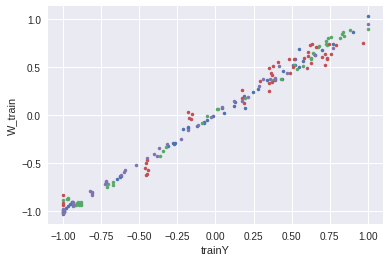

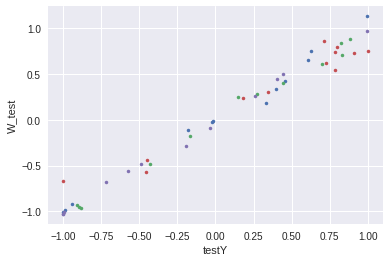

In [9]:
plt.plot(trainY,W_train,'.')
plt.ylabel('W_train')
plt.xlabel('trainY')
plt.show()
plt.plot(testY,W_test,'.')
plt.ylabel('W_test')
plt.xlabel('testY')
plt.show()

In [10]:
DAT04=pd.read_csv("Hydrofoil_ago_29_2018.csv")
DAT05 = []
DAT05 = DAT04.iloc[:,4:].copy()
print(DAT05.head())

   Resistence   Sinkage      Trim     Power
0    0.000000  0.000000  0.000000  0.000000
1    2.549729 -0.689028  1.353022  0.950991
2    3.628461 -0.835413  1.346323  1.624000
3    6.374322 -1.864337  1.361538  3.803965
4    8.217973 -2.301539  1.378858  5.517212


In [11]:
def original (x,x_old): # a rede neural satura. por isso a normalizacao
  strings = list(x)
  for i in strings:
    max_x=x_old[i].max()
    min_x=x_old[i].min()
    a=(max_x+min_x)/2
    b=(max_x-min_x)/2
    x[i]=x[i]*b+a
  return x
W_train02=original(W_train,DAT05)
W_test02=original(W_test,DAT05)
testY02 = original(testY,DAT05)
print(W_train02.head())
print("======================================================================")
print(W_test02.head())
print("======================================================================")
print(testY.head())
y1 = W_test02['Resistence'].copy()
y2 = testY02['Resistence'].copy()

   Resistence    Sinkage      Trim        Power
0  159.933688  30.685650  4.327027   448.576171
1    5.710846  -3.447602  1.125703   -34.723213
2  163.094398  28.028447  4.294044   480.691742
3   68.456112   0.643648  2.543159    87.720858
4  225.331410  84.668482  3.744039  1364.759737
   Resistence    Sinkage      Trim       Power
0   -1.899003  -4.130659  0.827318  -43.064850
1    3.923306  -3.581190  1.066605  -38.682006
2   15.466889  -2.814526  1.411715   -7.119776
3  166.943317  22.190620  4.652291  519.574158
4  184.981501  39.271515  4.496053  717.323126
   Resistence    Sinkage      Trim       Power
0    0.000000   0.000000  0.000000    0.000000
1    2.549729  -0.689028  1.353022    0.950991
5   10.365629  -1.506604  1.369050    7.732290
8  153.768272  25.026706  4.280094  458.816682
9  184.757286  39.739036  4.495847  689.102861
